In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib import font_manager, rc
import platform

# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False

## 규제 : 과적합을 줄이는 방법
- 과대적합이 일어나지 않도록 제어
- 계수(기울기 포함)의 값을 줄이는 방법
- 규제 개념이 적용된 모델 : 릿지(ridge)회귀모델, 라쏘(lasso)회귀모델
- 주로 릿지(ridge)회귀모델 선호

## 규제순서
- 1.정규화 : 스케일이 다른 항목들을 표준점수로 동일하게 표준화
    - sklearn 제공 클래스 사용
    <br>        
    <br>

- 2.릿지(ridge), 라쏘(lasso) 모델 적용

### 릿지(ridge) 회귀모델
- 계수를 제곱한 값을 기준으로 규제 적용
- 사용 패키지 : sklearn.linear_model
- 사용 클래스 : Ridge
- 사용 함수 : fit(), score(), predict()

### 라쏘(lasso) 회귀모델
- 계수의 절대값을 기준으로 규제 적용
- 사용 패키지 : sklearn.linear_model
- 사용 클래스 : Lasso
- 사용 함수 : fit(), score(), predict

In [2]:
# 데이터 준비
df = pd.read_csv('./data/03_농어의_길이_높이_두께_데이터.csv')

In [3]:
df.head(5)

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [4]:
# 사용할 데이터
    # - input데이터(독립변수) : 길이(length), 높이(height), 두께(width)
    # - target데이터(종속변수) : 무게(weight)
    # - 새로 추가할 데이터 : 면적(길이 * 높이)
    # 모든 작업은 sklearn에서 제공하는 함수 이용

In [5]:
# 데이터프레임 2차원으로 변경
# to_numpy()
perch = df.to_numpy()
print(perch)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [6]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [7]:
print(len(perch))
print(len(perch_weight))

56
56


In [8]:
# 훈련데이터, 테스트데이터 설정
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
    train_test_split(perch, perch_weight, random_state=42)

In [9]:
print('<훈련데이터>------------------------------------------------------------------')
print(train_input)
print('------------------------------------------------------------------------------')
print(train_target)
print()
print('<테스트데이터>----------------------------------------------------------------')
print(test_input)
print('------------------------------------------------------------------------------')
print(test_target)

<훈련데이터>------------------------------------------------------------------
[[19.6   5.14  3.04]
 [22.    5.88  3.52]
 [18.7   5.2   3.12]
 [17.4   4.59  2.94]
 [36.   10.61  6.74]
 [25.    6.44  3.68]
 [40.   11.93  7.11]
 [39.   12.43  7.35]
 [43.   11.93  7.28]
 [22.    5.64  3.52]
 [20.    5.08  2.77]
 [22.    6.11  3.52]
 [24.    7.29  3.72]
 [27.5   7.17  4.34]
 [43.   12.51  7.42]
 [40.   11.73  7.22]
 [24.    6.38  3.82]
 [21.    5.92  3.31]
 [27.5   7.05  4.34]
 [40.   12.38  7.46]
 [32.8  10.03  6.02]
 [26.5   7.17  4.14]
 [36.5  10.88  6.86]
 [13.7   3.53  2.  ]
 [22.7   5.95  3.63]
 [15.    3.82  2.43]
 [37.   10.57  6.37]
 [35.   11.49  7.8 ]
 [28.7   7.59  4.64]
 [23.5   6.28  3.72]
 [39.   11.14  6.  ]
 [21.    5.69  3.56]
 [23.    5.22  3.63]
 [22.    5.52  4.  ]
 [44.   12.49  7.6 ]
 [22.5   6.79  3.62]
 [19.    5.64  3.05]
 [37.   10.84  6.26]
 [22.    6.11  3.41]
 [25.6   6.56  4.24]
 [42.   12.8   6.87]
 [34.5  10.26  6.39]]
-------------------------------------------

In [10]:
# sklearn 변환기 클래스
from sklearn.preprocessing import PolynomialFeatures

In [11]:
poly = PolynomialFeatures(include_bias=False)

# 임의값 사용
temp_data =[[2,3]]

# 훈련시키키 : 새롭게 만들 특성 조합 스스로 찾기
poly.fit(temp_data)

# 찾은 특성 조합으로 데이터 변환하기
print(poly.transform(temp_data))

[[2. 3. 4. 6. 9.]]


In [12]:
# <변환기 특성조합 생성규칙>
# 첫번째 값 : 1, y절편 값(무조건 첫번째는 1)
# 두번째 값 : 2, 기존 첫번째 값(2)
# 세번째 값 : 3, 기존 두번째 값(3)
# 네번째 값 : 4, 기존 첫번째 값(2)의 제곱
# 다섯번째 값: 6, 기존 첫번째 값(2) * 기존 두번째값(3)
# 여섯번째 값: 9, 기존 두번째 값(3)의 제곱

# y절편의 1값은 PolynoialFeatures 클래스에서 기본적으로 특성에 추가된 절편값을 무시
    # - 추가된 y절편 1은 무시 가능
    # - PolynoialFeatures 클래스 생상시 제외시키는 속성 사용
    # - include_bias = False옵션 사용시 y절편값 제외

### 특성 만들기 : sklearn 변환기
- sklearn은 특성을 만들거나 전처리 하기 위해 다양한 객체를 제공
- sklearn에서 제공하는 이런 클래스들을 '변환기'라고 부릅니다.

### 특성 생성패키지
- 사용되는 패키지 : sklearn.preprocessing
- 사용되는 클래스 : PolynomialFeatures
- 사용되는 함수 : fit(), transform(), fit_transforms()
- 사용되는 데이터 : train_input, test_input
- 훈련에 영향을 미치는 특성(항목)을 스스로 찾아서 생성 -> target 해당사항없음

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
poly = PolynomialFeatures(degree=5, include_bias=False)

# 훈련은 훈련데이터로 1번만
poly.fit(train_input)

train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [15]:
train_poly.shape

(42, 55)

In [16]:
test_poly.shape

(14, 55)

In [17]:
#훈련모델이 사용된 조합의 패턴 출력하기
poly.get_feature_names()
poly.get_feature_names_out()

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

### 정규화(표준화)

In [18]:
# 정규화(표준화)
# 사용패키지
from sklearn.preprocessing import StandardScaler

In [19]:
# 표준점수 생성
ss = StandardScaler()
ss.fit(train_poly, train_target)

StandardScaler()

In [20]:
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [21]:
train_scaled.shape

(42, 55)

In [22]:
test_scaled.shape

(14, 55)

In [23]:
# 평균, 표준편차 확인
print('평균 : \n', ss.mean_)
print('표준편차 : \n',ss.scale_)

평균 : 
 [2.84452381e+01 8.04238095e+00 4.82047619e+00 8.85315000e+02
 2.53486881e+02 1.51959000e+02 7.29365000e+01 4.36999452e+01
 2.62868381e+01 2.97326070e+04 8.59817581e+03 5.15200651e+03
 2.49680043e+03 1.49567194e+03 8.99184494e+02 7.27945149e+02
 4.36019840e+02 2.62115117e+02 1.58141990e+02 1.05917983e+06
 3.08429517e+05 1.84644673e+05 9.01239554e+04 5.39478286e+04
 3.23998082e+04 2.64224658e+04 1.58167367e+04 9.49991053e+03
 5.72489005e+03 7.77162422e+03 4.65285399e+03 2.79521756e+03
 1.68494739e+03 1.01911272e+03 3.93876111e+07 1.15192532e+07
 6.88842737e+06 3.37865413e+06 2.02034307e+06 1.21184517e+06
 9.93774754e+05 5.94291271e+05 3.56516573e+05 2.14541208e+05
 2.93110780e+05 1.75313851e+05 1.05196649e+05 6.33244641e+04
 3.82394901e+04 8.66870097e+04 5.18625239e+04 3.11308026e+04
 1.87477065e+04 1.13270112e+04 6.86569419e+03]
표준편차 : 
 [8.72831196e+00 2.87343151e+00 1.74638123e+00 5.24782988e+02
 1.60836428e+02 9.64793789e+01 4.95165749e+01 2.97578956e+01
 1.81139412e+01 2.5015

### 릿지(Ridge) 모델

In [24]:
# 릿지(Ridge) 모델을 이용한 결정계수 확인
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)

Ridge()

In [25]:
print('Ridge 훈련데이터 결정계수 :', ridge.score(train_scaled, train_target))
print('Ridge 테스트데이터 결정계수 :', ridge.score(test_scaled, test_target))

Ridge 훈련데이터 결정계수 : 0.9896101671037343
Ridge 테스트데이터 결정계수 : 0.9790693977615386


### 라쏘(Lasso) 모델

In [26]:
# 라쏘(Lasso) 모델을 이용한 결정계수 확인
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)

Lasso()

In [27]:
print('Lasso 훈련데이터 결정계수 :', lasso.score(train_scaled, train_target))
print('Lasso 테스트데이터 결정계수 :', lasso.score(test_scaled, test_target))

Lasso 훈련데이터 결정계수 : 0.989789897208096
Lasso 테스트데이터 결정계수 : 0.9800593698421884


### 규제강도 조절하기
- Ridge, Lasso 모델의 규제강도 조절 속성 = alpha
- alpha : 사람이 직접 넣어줘야 한다
- 사람이 직접 넣어주는값 = 하이퍼파라미터 or 파라미터

### alpha값 찾기
- 정해진 방법은 없으나 일반적으로 쓰는 방법
- 1.훈련데이터, 학습데이터를 통한 모델생성 및 평가
- 2.결정계수 값을 이용한 그래프 시각화
- 3.훈련데이터와 테스트데이터의 결정계수값이 가장 가까워지는 지점의 x축값 선정

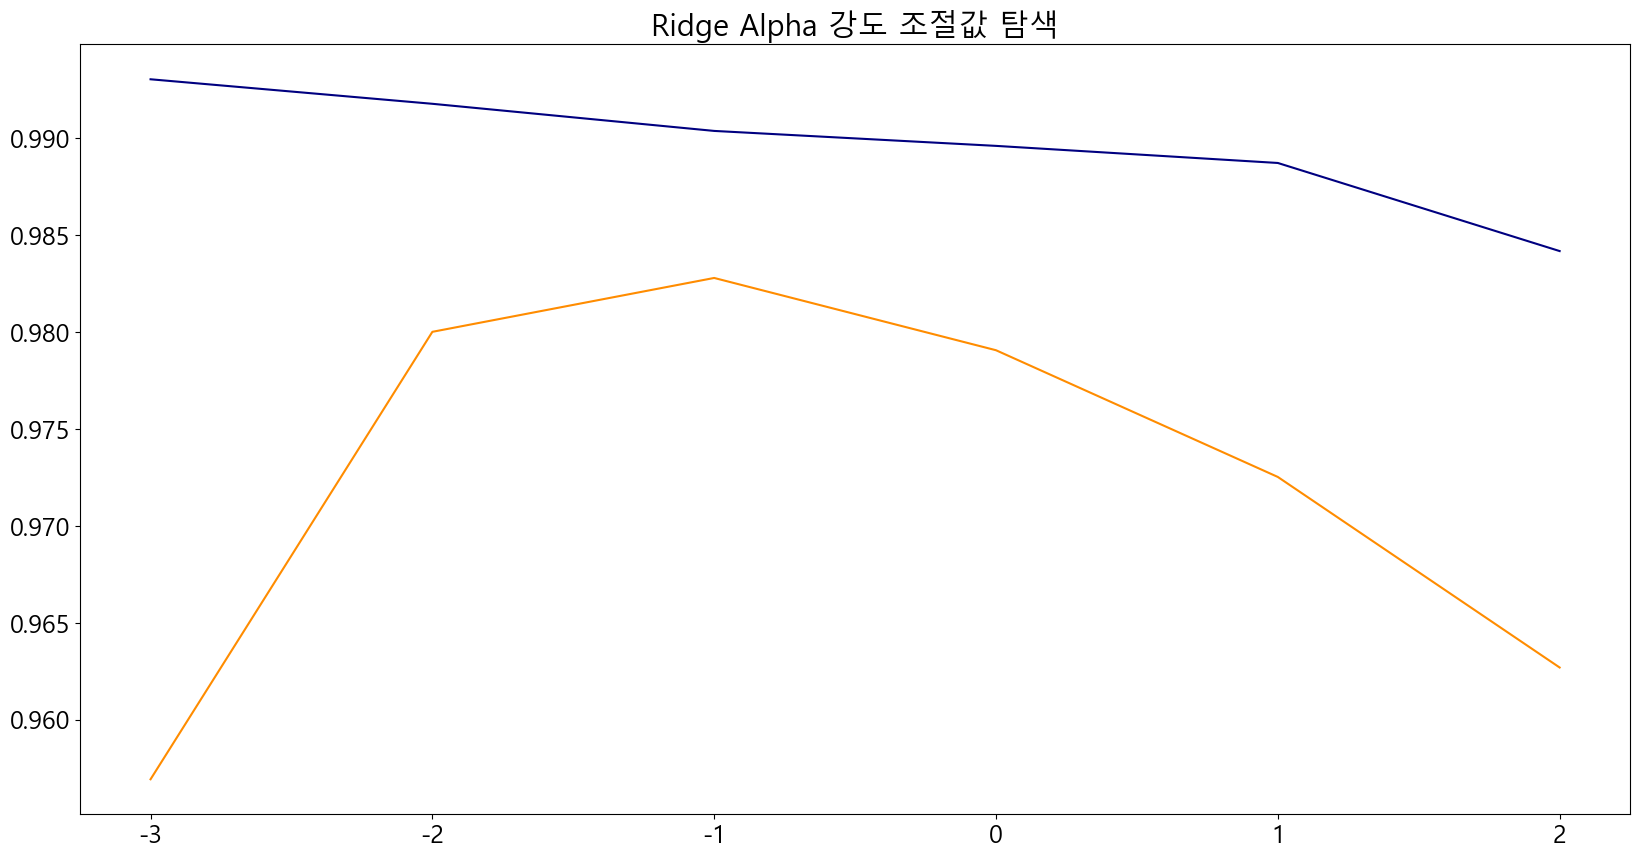

In [28]:
# Ridge alpha 강도 조절값 찾아보기

# 결정계수 리스트
train_score = []
test_score = []

# alpha값 범위
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list :
    # 릿지모델
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

fig = plt.figure(figsize=(20,10))
plt.rc('font', family = 'Malgun Gothic', size = 18)
plt.title('Ridge Alpha 강도 조절값 탐색')

plt.plot(np.log10(alpha_list), train_score, color='navy')
plt.plot(np.log10(alpha_list), test_score, color='darkorange')

plt.rcParams['lines.linewidth'] = 2

# plt.xlabel('농어 길이(cm)')
# plt.ylabel('농어 무게(kg)')
plt.show()

In [29]:
# 릿지(Ridge) 모델을 이용한 결정계수 확인
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print('Ridge 훈련데이터 결정계수 :', ridge.score(train_scaled, train_target))
print('Ridge 테스트데이터 결정계수 :', ridge.score(test_scaled, test_target))

Ridge 훈련데이터 결정계수 : 0.9903815817570368
Ridge 테스트데이터 결정계수 : 0.9827976465386896


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.062e+02, toleranc

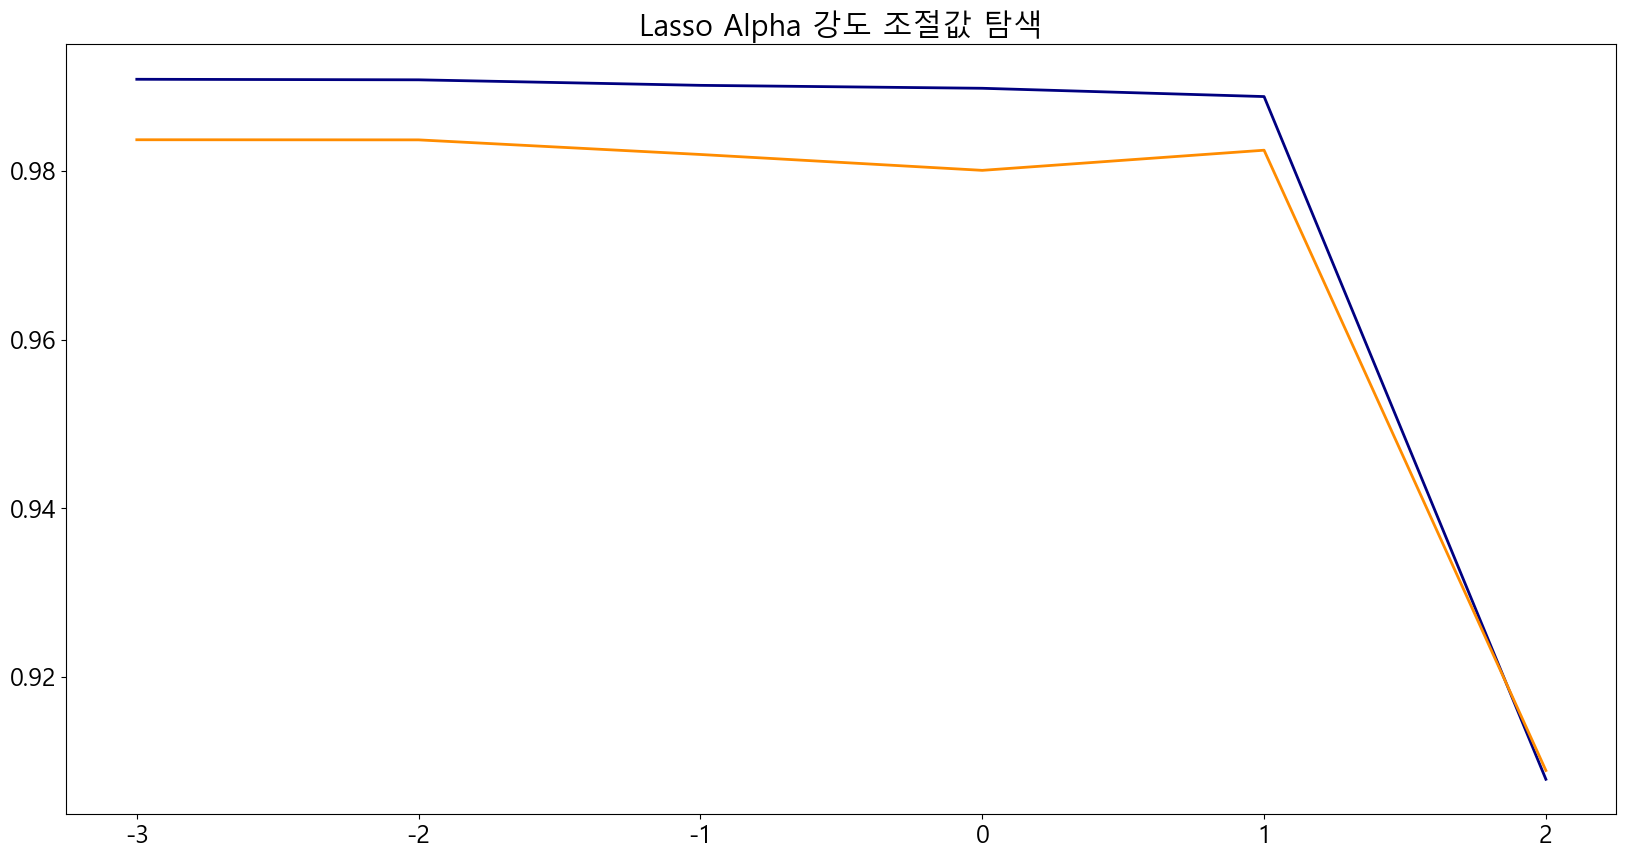

In [30]:
# Lasso alpha 강도 조절값 찾아보기

# 결정계수 리스트
train_score = []
test_score = []

# alpha값 범위
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list :
    # 라쏘모델
    lasso = Lasso(alpha = alpha)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

fig = plt.figure(figsize=(20,10))
plt.rc('font', family = 'Malgun Gothic', size = 18)
plt.title('Lasso Alpha 강도 조절값 탐색')

plt.plot(np.log10(alpha_list), train_score, color='navy')
plt.plot(np.log10(alpha_list), test_score, color='darkorange')

plt.rcParams['lines.linewidth'] = 2

# plt.xlabel('농어 길이(cm)')
# plt.ylabel('농어 무게(kg)')
plt.show()

In [31]:
# 릿지(Ridge) 모델을 이용한 결정계수 확인
from sklearn.linear_model import Ridge
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print('Lasso 훈련데이터 결정계수 :', lasso.score(train_scaled, train_target))
print('Lasso 테스트데이터 결정계수 :', lasso.score(test_scaled, test_target))

Lasso 훈련데이터 결정계수 : 0.9888067471131867
Lasso 테스트데이터 결정계수 : 0.9824470598706695


In [ ]:
Lasso 훈련데이터 결정계수 : 0.989
Lasso 테스트데이터 결정계수 : 0.982

Ridge 훈련데이터 결정계수 : 0.990
Ridge 테스트데이터 결정계수 : 0.983

In [32]:
# 최종 선택 모델 : Ridge